# UAS Data, Informasi dan Pengetahuan

# Tanpa Feature Selection

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('titanic_dataset.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.drop(['name'], axis=1, inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)

In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,750,211.3375,169,3,1,227
1,1,1,0,0.9167,1,2,512,151.5500,112,3,18,277
2,1,0,1,2.0000,1,2,512,151.5500,112,3,0,277
3,1,0,0,30.0000,1,2,512,151.5500,112,3,0,277
4,1,0,1,25.0000,1,2,512,151.5500,112,3,0,277


In [ ]:
#pengecekan missing values
missing_data = df.isnull()
missing_data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

pclass
False    1309
Name: pclass, dtype: int64

survived
False    1309
Name: survived, dtype: int64

sex
False    1309
Name: sex, dtype: int64

age
False    1046
True      263
Name: age, dtype: int64

sibsp
False    1309
Name: sibsp, dtype: int64

parch
False    1309
Name: parch, dtype: int64

ticket
False    1309
Name: ticket, dtype: int64

fare
False    1308
True        1
Name: fare, dtype: int64

cabin
False    1309
Name: cabin, dtype: int64

embarked
False    1309
Name: embarked, dtype: int64

boat
False    1309
Name: boat, dtype: int64

home.dest
False    1309
Name: home.dest, dtype: int64



In [ ]:
rata1 = df['age'].astype('float').mean(axis=0)
rata2 = df['fare'].astype('float').mean(axis=0)
print(rata1)
print(rata2)

29.8811345124283
33.29547928134572


In [ ]:
df['age'].replace(np.nan, rata1, inplace = True)
df['fare'].replace(np.nan, rata2, inplace = True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,750,211.3375,169,3,1,227
1,1,1,0,0.9167,1,2,512,151.5500,112,3,18,277
2,1,0,1,2.0000,1,2,512,151.5500,112,3,0,277
3,1,0,0,30.0000,1,2,512,151.5500,112,3,0,277
4,1,0,1,25.0000,1,2,512,151.5500,112,3,0,277


In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,750,211.3375,169,3,1,227
1,1,1,0,0.9167,1,2,512,151.5500,112,3,18,277
2,1,0,1,2.0000,1,2,512,151.5500,112,3,0,277
3,1,0,0,30.0000,1,2,512,151.5500,112,3,0,277
4,1,0,1,25.0000,1,2,512,151.5500,112,3,0,277


In [ ]:
df.dtypes

pclass         int64
survived       int64
sex            int64
age          float64
sibsp          int64
parch          int64
ticket         int64
fare         float64
cabin          int64
embarked       int64
boat           int64
home.dest      int64
dtype: object

In [ ]:
X_ori = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'home.dest']].values  
X_ori[0:5]

array([[  1.    ,   1.    ,  29.    ,   0.    ,   0.    , 750.    ,
        211.3375, 169.    ,   3.    ,   1.    , 227.    ],
       [  1.    ,   0.    ,   0.9167,   1.    ,   2.    , 512.    ,
        151.55  , 112.    ,   3.    ,  18.    , 277.    ],
       [  1.    ,   1.    ,   2.    ,   1.    ,   2.    , 512.    ,
        151.55  , 112.    ,   3.    ,   0.    , 277.    ],
       [  1.    ,   0.    ,  30.    ,   1.    ,   2.    , 512.    ,
        151.55  , 112.    ,   3.    ,   0.    , 277.    ],
       [  1.    ,   1.    ,  25.    ,   1.    ,   2.    , 512.    ,
        151.55  , 112.    ,   3.    ,   0.    , 277.    ]])

In [ ]:
Y_ori = df['survived'].values
Y_ori[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ori, Y_ori, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (1047, 11) (1047,)
Test set: (262, 11) (262,)


In [ ]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = model.predict(X_test)
print("Nilai sebenarnya : ", Y_test)
print("Nilai prediksi : ", Y_pred)

Nilai sebenarnya :  [0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 1]
Nilai prediksi :  [0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0
 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0

In [ ]:
print("Train set accuracy (Naive Bayes) : ", accuracy_score(Y_train, model.predict(X_train))*100)
print("Test set accuracy (Naive Bayes) : ", accuracy_score(Y_test, Y_pred)*100)

Train set accuracy (Naive Bayes) :  91.78605539637059
Test set accuracy (Naive Bayes) :  91.6030534351145


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[137,  11],
       [ 11, 103]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       148
           1       0.90      0.90      0.90       114

    accuracy                           0.92       262
   macro avg       0.91      0.91      0.91       262
weighted avg       0.92      0.92      0.92       262



In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['seaborn'])

In [ ]:
unique, counts_act = np.unique(Y_test, return_counts=True)
print('Jumlah data penumpang not survive (0) dan survived(1) pada nilai sebenarnya: ')
print(np.asarray((unique, counts_act)))

Jumlah data penumpang not survive (0) dan survived(1) pada nilai sebenarnya: 
[[  0   1]
 [148 114]]


In [ ]:
unique, counts_pred = np.unique(Y_pred, return_counts=True)
print('Jumlah data penumpang not survive (0) dan survived(1) pada nilai prediksi: ')
print(np.asarray((unique, counts_pred)))

Jumlah data penumpang not survive (0) dan survived(1) pada nilai prediksi: 
[[  0   1]
 [148 114]]


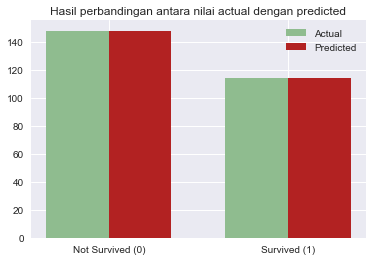

In [ ]:
N = 2
actual_count = counts_act
pred_count = counts_pred

fig, ax = plt.subplots()

ind = np.arange(N)
width = 0.35

actual = ax.bar(ind, actual_count, width, color='darkseagreen')
predict = ax.bar(ind+width, pred_count, width, color='firebrick')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Not Survived (0)', 'Survived (1)'))

plt.title('Hasil perbandingan antara nilai actual dengan predicted')
ax.legend((actual[0], predict[0]), ('Actual', 'Predicted'))
ax.autoscale_view()

plt.show()

---

# Menggunakan Feature Selection Chi Square

In [ ]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'home.dest']] 
X[0:5]

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,29.0000,0,0,750,211.3375,169,3,1,227
1,1,0,0.9167,1,2,512,151.5500,112,3,18,277
2,1,1,2.0000,1,2,512,151.5500,112,3,0,277
3,1,0,30.0000,1,2,512,151.5500,112,3,0,277
4,1,1,25.0000,1,2,512,151.5500,112,3,0,277


In [ ]:
Y = df[['survived']]
Y[0:5]

,survived
0,1
1,1
2,0
3,0
4,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#Seleksi fitur menggunakan chi-square dengan nilai k=7 (dipilih sebanyak 7 fitur yang paling 'important')
feature_select = SelectKBest(chi2, k=7) 
feature_select.fit(X,Y)
ix = feature_select.get_support() 
df_fselect = pd.DataFrame(feature_select.transform(X), columns = X.columns.values[ix])
df_fselect.head()

,pclass,sex,age,fare,cabin,boat,home.dest
0,1.0,1.0,29.0000,211.3375,169.0,1.0,227.0
1,1.0,0.0,0.9167,151.5500,112.0,18.0,277.0
2,1.0,1.0,2.0000,151.5500,112.0,0.0,277.0
3,1.0,0.0,30.0000,151.5500,112.0,0.0,277.0
4,1.0,1.0,25.0000,151.5500,112.0,0.0,277.0


In [ ]:
X = df_fselect.values
X[0:5]

array([[  1.    ,   1.    ,  29.    , 211.3375, 169.    ,   1.    ,
        227.    ],
       [  1.    ,   0.    ,   0.9167, 151.55  , 112.    ,  18.    ,
        277.    ],
       [  1.    ,   1.    ,   2.    , 151.55  , 112.    ,   0.    ,
        277.    ],
       [  1.    ,   0.    ,  30.    , 151.55  , 112.    ,   0.    ,
        277.    ],
       [  1.    ,   1.    ,  25.    , 151.55  , 112.    ,   0.    ,
        277.    ]])

In [ ]:
Y = df['survived'].values
Y[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [ ]:
X_train_chi, X_test_chi, Y_train_chi, Y_test_chi = train_test_split(X, Y, test_size=0.2, random_state=1)
print ('Train set:', X_train_chi.shape,  Y_train_chi.shape)
print ('Test set:', X_test_chi.shape,  Y_test_chi.shape)

Train set: (1047, 7) (1047,)
Test set: (262, 7) (262,)


In [ ]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train_chi, Y_train_chi)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred_chi = model.predict(X_test_chi)
print("Nilai sebenarnya : ", Y_test_chi)
print("Nilai prediksi : ", Y_pred_chi)

Nilai sebenarnya :  [0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 1]
Nilai prediksi :  [0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1

In [ ]:
print("Train set accuracy (Naive Bayes) : ", accuracy_score(Y_train_chi, model.predict(X_train_chi))*100)
print("Test set accuracy (Naive Bayes) : ", accuracy_score(Y_test_chi, Y_pred_chi)*100)

Train set accuracy (Naive Bayes) :  91.02196752626553
Test set accuracy (Naive Bayes) :  95.0381679389313


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_chi, Y_pred_chi)

array([[149,   7],
       [  6, 100]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_chi, Y_pred_chi))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       156
           1       0.93      0.94      0.94       106

    accuracy                           0.95       262
   macro avg       0.95      0.95      0.95       262
weighted avg       0.95      0.95      0.95       262



In [ ]:
unique, counts_act_chi = np.unique(Y_test_chi, return_counts=True)
print('Jumlah data penumpang not survive (0) dan survived(1) pada nilai sebenarnya: ')
print(np.asarray((unique, counts_act_chi)))

Jumlah data penumpang not survive (0) dan survived(1) pada nilai sebenarnya: 
[[  0   1]
 [156 106]]


In [ ]:
unique, counts_pred_chi = np.unique(Y_pred_chi, return_counts=True)
print('Jumlah data penumpang not survive (0) dan survived(1) pada nilai prediksi: ')
print(np.asarray((unique, counts_pred_chi)))

Jumlah data penumpang not survive (0) dan survived(1) pada nilai prediksi: 
[[  0   1]
 [155 107]]


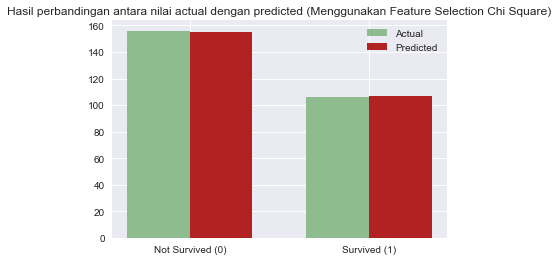

In [ ]:
N = 2
actual_count_chi = counts_act_chi
pred_count_chi = counts_pred_chi

fig, ax = plt.subplots()

ind = np.arange(N)
width = 0.35

actual_chi = ax.bar(ind, actual_count_chi, width, color='darkseagreen')
predict_chi = ax.bar(ind+width, pred_count_chi, width, color='firebrick')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Not Survived (0)', 'Survived (1)'))

plt.title('Hasil perbandingan antara nilai actual dengan predicted (Menggunakan Feature Selection Chi Square)')
ax.legend((actual[0], predict[0]), ('Actual', 'Predicted'))
ax.autoscale_view()

plt.show()


---

# Analisa Hasil Akhir 